# Two competing species
### Kirill Zakharov

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use("ggplot")

In [2]:
#Runge-Kutt method
def runge_Kutt(f, g, t0, x0, y0, h, b):
    t = t0
    x = x0
    y = y0
    arrayX = np.array([])
    arrayY = np.array([])
    arrayT = np.array([])
    while t<b:
        k1 = g(t, x, y)
        q1 = f(t, x, y)
        
        k2 = g(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        q2 = f(t + h/2, x + (h*q1)/2, y + (h*k1)/2)
        
        k3 = g(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        q3 = f(t + h/2, x + (h*q2)/2, y + (h*k2)/2)
        
        k4 = g(t + h, x + h*q3, y + h*k3)
        q4 = f(t + h, x + h*q3, y + h*k3)
        
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        x = x + h*(q1 + 2*q2 + 2*q3 + q4)/6
        
        arrayX = np.append(arrayX, x)
        arrayT = np.append(arrayT, t)
        arrayY = np.append(arrayY, y)
        
        t += h
    return arrayT, arrayX, arrayY

In [22]:
# a1 = 1
# a2 = 1
# b11 = 0.2
# b12 = 0.3
# b21 = 0.205
# b22 = 0.25
a1 = 1
a2 = 0.75
b11 = 1
b12 = 0.85
b21 = 0.55
b22 = 0.55

def fx(t, x, y):
    return a1*x - b11*x**2 - b12*x*y

def fy(t, x, y):
    return a2*y - b21*x*y - b22*y**2

def fxl(t, x, y):
    return a1*math.log(x) - b11*math.log(x)**2 - b12*math.log(x)*math.log(y)

def fyl(t, x, y):
    return a2*math.log(y) - b21*math.log(x)*math.log(y) - b22*math.log(y)**2


p1, p2, p3 = runge_Kutt(fxl, fyl, 0, 4, 5, 0.01, 100)
print(f"Solution: x = {p2[-1]}, y = {p3[-1]}")

Solution: x = 1.0000001991111718, y = 3.910382811931909


## Visualization

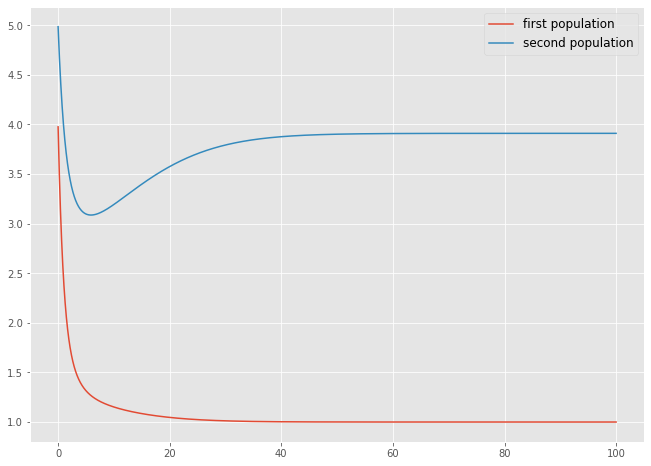

In [23]:
fig, ax = plt.subplots(figsize=(11,8))
n = len(p1)
t = np.linspace(0, 100, n)
t1 = np.linspace(0, 14, 20)
plt.plot(t, p2, label="first population")
plt.plot(t, p3, label="second population")

plt.legend(prop={'size': 12})
plt.show()

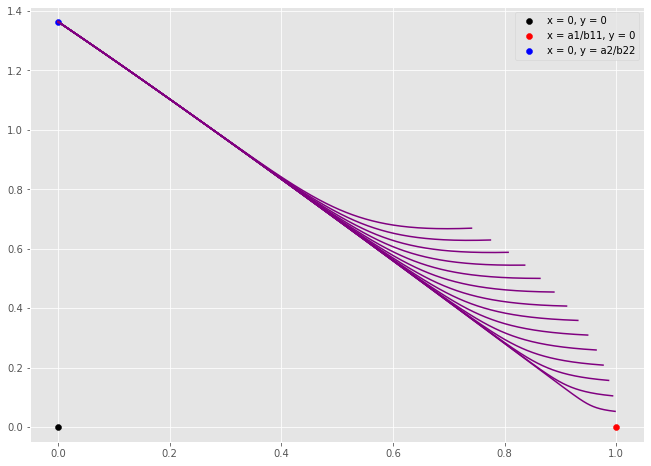

In [27]:
fig, ax = plt.subplots(figsize=(11, 8))
for i in range(15):
    p1, p2, p3 = runge_Kutt(fx, fy, 0, math.cos(i*np.pi/60), math.sin(i*np.pi/60), 0.01, 100)
    plt.plot(p2, p3,c='purple')

#stationary points
plt.scatter(0, 0, c='black', label="x = 0, y = 0")
plt.scatter(a1/b11, 0, c='red', label="x = a1/b11, y = 0")
plt.scatter(0, a2/b22, c='blue', label="x = 0, y = a2/b22")
plt.scatter((b12*a2 - b22*a1)/(b21*b12 - b22*b11), (a1*b21 - a2*b11)/(b12*b21 - b22*b11), c='green')
ax.set_xlim(-0.05, a1/b11+0.05)
ax.set_ylim(-0.05, a2/b22+0.05)
plt.legend()    
plt.show()

### x1 = 0, x2 = 0

In [18]:
x1 = 0
x2 = 0
jacobi_matrix = np.array([[a1-2*b11*x1-b12*x2, -b12*x1], [-b21*x2, a2-2*b22*x2-b21*x1]])
jacobi_matrix

array([[ 1., -0.],
       [-0.,  1.]])

In [19]:
D0 = (jacobi_matrix.trace())**2-4*(jacobi_matrix[0][0]*jacobi_matrix[1][1]-(jacobi_matrix[0][1]*jacobi_matrix[1][0]))
D0

0.0

неустойчивый узел

### x1 = a1/b11, x2 = 0

In [20]:
x1 = a1/b11
x2 = 0
jacobi_matrix = np.array([[a1-2*b11*x1-b12*x2, -b12*x1], [-b21*x2, a2-2*b22*x2-b21*x1]])
jacobi_matrix

array([[-1.   , -1.5  ],
       [-0.   , -0.025]])

In [22]:
D = (jacobi_matrix.trace())**2-4*(jacobi_matrix[0][0]*jacobi_matrix[1][1]-(jacobi_matrix[0][1]*jacobi_matrix[1][0]))
D

0.9506250000000003

устойчивый узел

### x1 = 0, x2 = a2/b22

In [23]:
x1 = 0
x2 = a2/b22
jacobi_matrix1 = np.array([[a1-2*b11*x1-b12*x2, -b12*x1], [-b21*x2, a2-2*b22*x2-b21*x1]])
jacobi_matrix1

array([[-0.2 , -0.  ],
       [-0.82, -1.  ]])

In [24]:
D1 = (jacobi_matrix1.trace())**2-4*(jacobi_matrix1[0][0]*jacobi_matrix1[1][1]-(jacobi_matrix1[0][1]*jacobi_matrix1[1][0]))
D1

0.6400000000000001

устойчивый узел

### x1 = (a2b12-a1b22)/(b12b21-b22b11), x2 = (a1b21-a2b11)/(b12b21-b22b11)

In [26]:
x1 = (a2*b12-a1*b22)/(b12*b21-b22*b11)
x2 = (a1*b21-a2*b11)/(b12*b21-b22*b11)
jacobi_matrix2 = np.array([[a1-2*b11*x1-b12*x2, -b12*x1], [-b21*x2, a2-2*b22*x2-b21*x1]])
jacobi_matrix2

array([[-0.86956522, -1.30434783],
       [-0.08913043, -0.10869565]])

In [30]:
D2 = (jacobi_matrix1.trace())**2-4*(jacobi_matrix1[0][0]*jacobi_matrix1[1][1]-(jacobi_matrix1[0][1]*jacobi_matrix1[1][0]))
D2

0.6400000000000001

Седло